<a href="https://colab.research.google.com/github/HectorGtz27/FlameForeCastModel/blob/main/EMILIO5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS**



Importar las bibliotecas

In [1]:
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter



Lectura de los datos

In [2]:
df = pd.read_csv('DataSet23.csv', parse_dates=['Datetime'])
print(df.head())


   Unnamed: 0  brightness  confidence daynight      hora       fecha  \
0           0       322.0          68        D  21:00:00  24/02/2016   
1           1       313.8          32        D  18:00:00  30/03/2016   
2           2       325.5          67        D  17:00:00  03/04/2016   
3           3       339.3          86        D  17:00:00  03/04/2016   
4           4       301.6          43        N  09:00:00  04/04/2016   

             Datetime  fuego   latitude  longitude  
0 2016-02-24 21:00:00       1   30.8342  -110.8534  
1 2016-03-30 18:00:00       1   31.2519  -110.9623  
2 2016-03-04 17:00:00       1   31.0972  -110.8965  
3 2016-03-04 17:00:00       1   31.0988  -110.9110  
4 2016-04-04 09:00:00       1   30.7656  -110.8255  


Agrupar los registros por día

In [3]:
# Group the records by day
vPd = df.groupby([pd.Grouper(key='Datetime', freq='D')]).size().reset_index(name='count')

# Show the first few rows of the dataframe to understand its structure
vPd


,Datetime,count
0,2016-02-24,1
1,2016-02-25,0
2,2016-02-26,0
3,2016-02-27,0
4,2016-02-28,0
...,...,...
2838,2023-12-02,0
2839,2023-12-03,0
2840,2023-12-04,1
2841,2023-12-05,0


Agrupar los registros por mes

In [4]:
# Group the records by month
vPm = df.groupby([pd.Grouper(key='Datetime', freq='M')]).size().reset_index(name='count')

# Show the first few rows of the dataframe to understand its structure
vPm


,Datetime,count
0,2016-02-29,1
1,2016-03-31,3
2,2016-04-30,4
3,2016-05-31,2
4,2016-06-30,1
...,...,...
90,2023-08-31,1
91,2023-09-30,19
92,2023-10-31,2
93,2023-11-30,1


Obtener los nombres de los meses

In [5]:
# Get the names of the months from the 'Datetime' column in the vPm DataFrame
month_names = vPm["Datetime"].dt.month_name()
month_names


0      February
1         March
2         April
3           May
4          June
        ...    
90       August
91    September
92      October
93     November
94     December
Name: Datetime, Length: 95, dtype: object

Se genera un grafico con las frecuencias de registros por dia en el periodo del 2016 al 2023

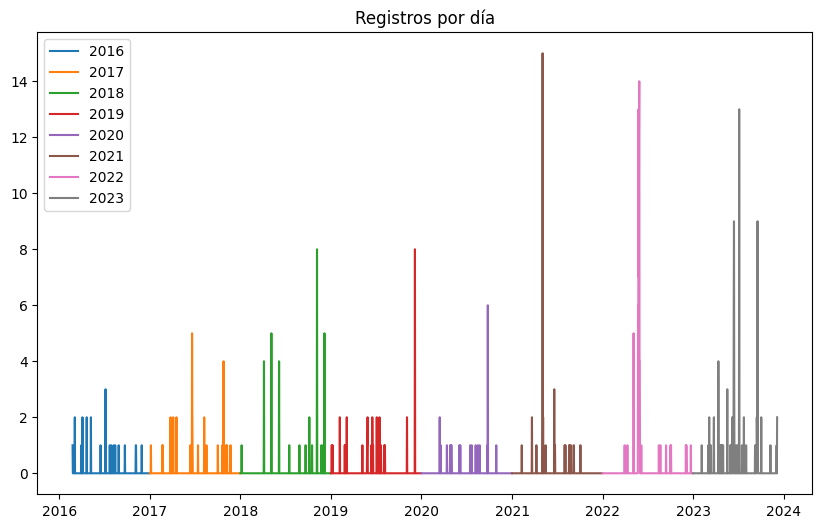

In [6]:
# Define a function to format the y-axis labels
def format_y_tick(tick_val, tick_pos):
    return f'{int(tick_val):,}'

# Plot the data
fig = plt.figure(figsize=(10, 6))
for year in vPd['Datetime'].dt.year.unique():
    data = vPd[vPd['Datetime'].dt.year == year]
    plt.plot(data['Datetime'], data['count'], label=year)

plt.title('Registros por día')
plt.ticklabel_format(axis='y', style='plain')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))
plt.legend()
plt.show()


Frecuencia de Registros por Mes

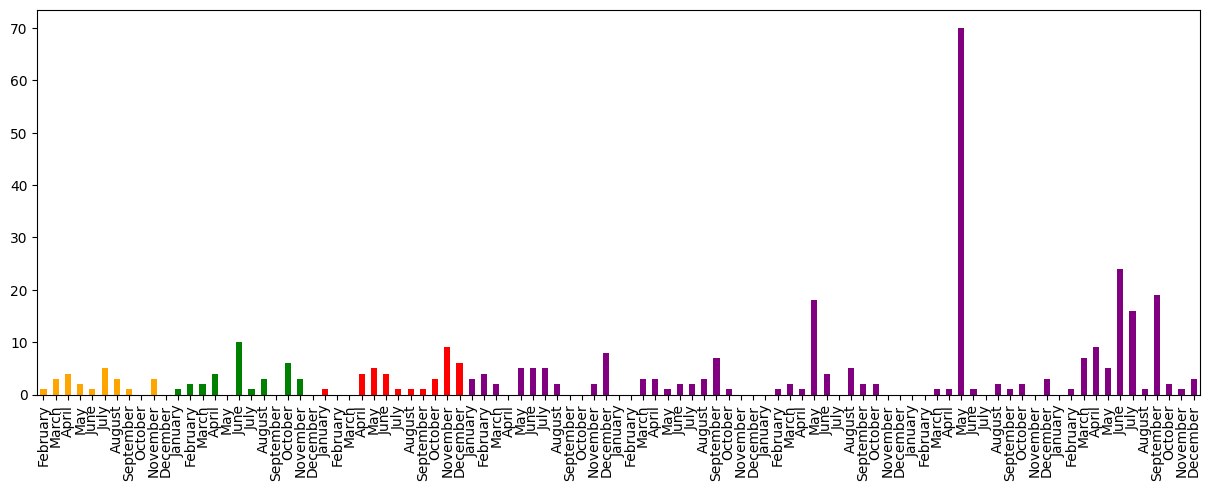

In [7]:
# Define a function to assign a color to each year
def assign_color(row):
    year = row.Datetime.year
    if year == 2015:
        return 'blue'
    elif year == 2016:
        return 'orange'
    elif year == 2017:
        return 'green'
    elif year == 2018:
        return 'red'
    else:
        return 'purple'

# Apply the function to each row of the dataframe to generate a list of colors
colors = vPm.apply(assign_color, axis=1)

# Generate the bar chart
ax = vPm["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Change the x-axis labels
ax.set_xticklabels(vPm["Datetime"].dt.month_name())

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Set the y-axis tick formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Show the plot
plt.show()


Frecuencia de Registros por Mes

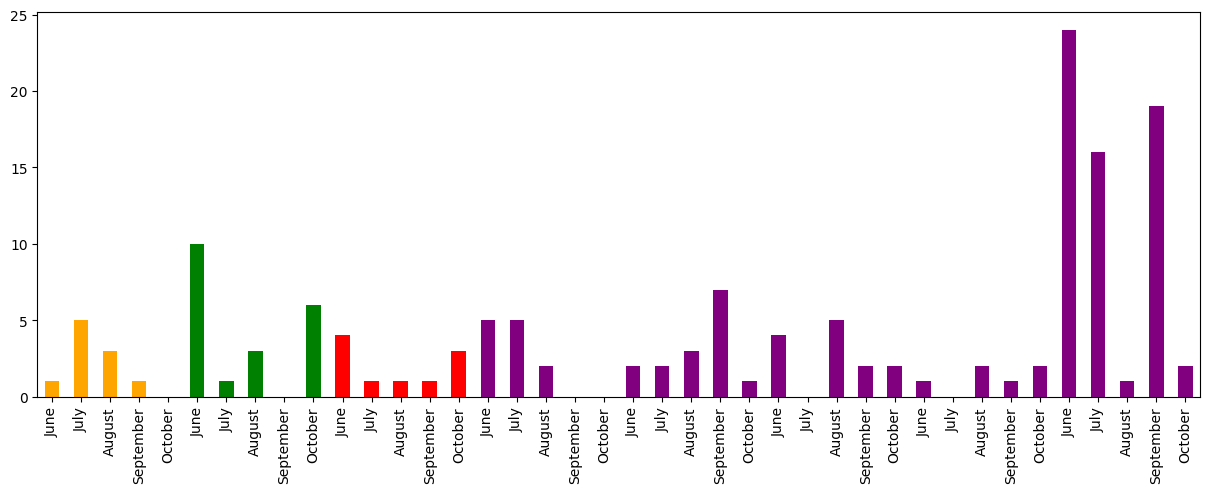

In [8]:
# Filter the data to include only the months from June to October
vPmPrincipal = vPm[(vPm["Datetime"].dt.month > 5) & (vPm["Datetime"].dt.month < 11)]

# Apply the function to each row of the dataframe to generate a list of colors
colors = vPmPrincipal.apply(assign_color, axis=1)

# Generate the bar chart
ax = vPmPrincipal["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Change the x-axis labels
ax.set_xticklabels(vPmPrincipal["Datetime"].dt.month_name())

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Set the y-axis tick formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Show the plot
plt.show()


# **EDA**

Import libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
pip install numpy

In [11]:
pip install scipy

Se carga un dataset diferente este se va a utilizar para conocer mas a fondo sobre como otras variables pueden afectar a los incendios

In [12]:
# Cargar el dataset
file_path = 'DataSet22.csv'  # Asegúrate de que este sea el camino correcto al archivo
df = pd.read_csv(file_path)

df


,Indice,latitude,longitude,brightness,scan,track,satellite,instrument,confidence,version,...,temperatura,temperatura_aparente,indice_calor,precipitacion,humedad,velocidad_viento,radiacion_solar,nubosidad,wind_direction,Incendio
0,1,30.83420,-110.85340,322.00,1.90,1.30,Aqua,MODIS,68,6.03,...,15.6,12.8,15.6,0.0,20.0,1.5,0.0,0.0,285.6,1
1,2,31.25190,-110.96230,313.80,1.10,1.00,Terra,MODIS,32,6.03,...,14.5,15.2,14.5,0.0,27.2,5.0,340.4,0.3,234.2,1
2,3,31.09720,-110.89650,325.50,1.40,1.20,Terra,MODIS,67,6.03,...,25.3,29.0,25.3,0.0,9.9,2.1,873.7,0.0,181.4,1
3,4,31.09880,-110.91100,339.30,1.40,1.20,Terra,MODIS,86,6.03,...,25.3,29.0,25.3,0.0,9.9,2.1,873.7,0.0,81.6,1
4,5,30.76560,-110.82550,301.60,1.00,1.00,Aqua,MODIS,43,6.03,...,12.6,11.8,12.6,0.0,31.2,1.6,34.3,0.0,272.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,348,30.81045,-110.98147,324.69,1.12,1.05,Aqua,MODIS,11,6.1NRT,...,28.3,24.7,28.3,0.0,22.6,4.2,0.0,0.0,240.5,1
348,349,30.86238,-110.95789,332.71,1.12,1.05,Aqua,MODIS,74,6.1NRT,...,28.3,24.7,28.3,0.0,22.6,4.2,0.0,0.0,240.5,1
349,350,30.87167,-110.95984,333.47,1.12,1.05,Aqua,MODIS,56,6.1NRT,...,28.3,24.7,28.3,0.0,22.6,4.2,0.0,0.0,240.5,1
350,351,30.87224,-110.97795,305.98,1.90,1.35,Terra,MODIS,66,6.1NRT,...,18.1,16.7,18.1,0.0,51.6,1.7,0.0,0.0,156.5,1


Se obtienen las columnas

In [13]:
# Obtener el número de columnas en el DataFrame
num_columns = df.shape[1]

num_columns


26

Se leen las variables a analizar

In [14]:
# Leer solo las columnas especificadas del archivo CSV
# frp, fire radiation power
columnas_deseadas = ['brightness', 'scan', 'track', 'satellite', 'confidence','frp','daynight','hora',
                     'fecha','temperatura', 'temperatura_aparente', 'indice_calor', 'precipitacion' , 'humedad',
                     'velocidad_viento', 'radiacion_solar', 'nubosidad' , 'wind_direction' , 'Incendio']

# Cargar solo las columnas deseadas del nuevo dataset
filtered_df = pd.read_csv('DataSet22.csv', usecols=columnas_deseadas)  # Asegúrate de incluir la extensión '.csv'

# Obtener el número de filas en el DataFrame filtrado
num_filas_filtered = filtered_df.shape[0]

# Mostrar las primeras filas del DataFrame filtrado y el número de filas
print(filtered_df.head())
print(f'El DataFrame tiene {num_filas_filtered} filas.')

   brightness  scan  track satellite  confidence   frp daynight      hora  \
0       322.0   1.9    1.3      Aqua          68  21.2        D  21:00:00   
1       313.8   1.1    1.0     Terra          32   5.8        D  18:00:00   
2       325.5   1.4    1.2     Terra          67  17.3        D  17:00:00   
3       339.3   1.4    1.2     Terra          86  46.8        D  17:00:00   
4       301.6   1.0    1.0      Aqua          43   7.8        N  09:00:00   

        fecha  temperatura  temperatura_aparente  indice_calor  precipitacion  \
0  24/02/2016         15.6                  12.8          15.6            0.0   
1  30/03/2016         14.5                  15.2          14.5            0.0   
2  03/04/2016         25.3                  29.0          25.3            0.0   
3  03/04/2016         25.3                  29.0          25.3            0.0   
4  04/04/2016         12.6                  11.8          12.6            0.0   

   humedad  velocidad_viento  radiacion_solar  nub

Se imprime la cabeza del dataset

In [15]:
df.head()

,Indice,latitude,longitude,brightness,scan,track,satellite,instrument,confidence,version,...,temperatura,temperatura_aparente,indice_calor,precipitacion,humedad,velocidad_viento,radiacion_solar,nubosidad,wind_direction,Incendio
0,1,30.8342,-110.8534,322.0,1.9,1.3,Aqua,MODIS,68,6.03,...,15.6,12.8,15.6,0.0,20.0,1.5,0.0,0.0,285.6,1
1,2,31.2519,-110.9623,313.8,1.1,1.0,Terra,MODIS,32,6.03,...,14.5,15.2,14.5,0.0,27.2,5.0,340.4,0.3,234.2,1
2,3,31.0972,-110.8965,325.5,1.4,1.2,Terra,MODIS,67,6.03,...,25.3,29.0,25.3,0.0,9.9,2.1,873.7,0.0,181.4,1
3,4,31.0988,-110.9110,339.3,1.4,1.2,Terra,MODIS,86,6.03,...,25.3,29.0,25.3,0.0,9.9,2.1,873.7,0.0,81.6,1
4,5,30.7656,-110.8255,301.6,1.0,1.0,Aqua,MODIS,43,6.03,...,12.6,11.8,12.6,0.0,31.2,1.6,34.3,0.0,272.7,1


<ipython-input-16-d339ef20dc00>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_df['daynight'] = correlation_df['daynight'].apply(lambda x: 1 if x == 'D' else 0)
<ipython-input-16-d339ef20dc00>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


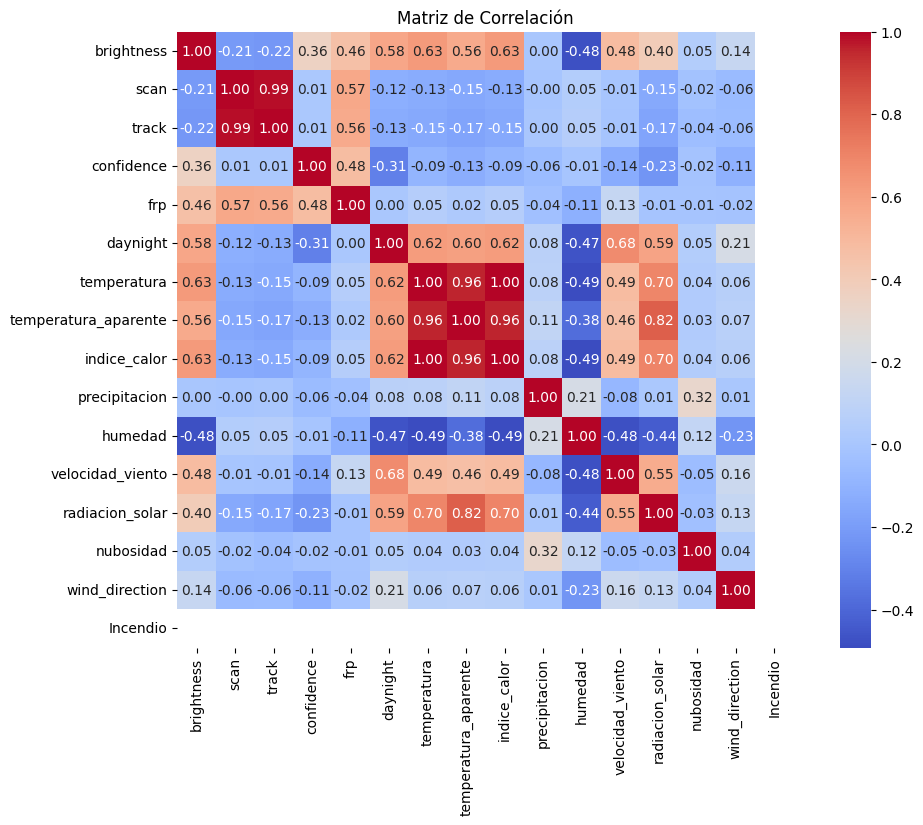

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Leer el DataFrame del archivo CSV
df = pd.read_csv('DataSet22.csv')

# Seleccionar las columnas deseadas
selected_columns = ['brightness', 'scan', 'track', 'satellite', 'confidence','frp','daynight','hora',
                     'fecha','temperatura', 'temperatura_aparente', 'indice_calor', 'precipitacion' , 'humedad',
                     'velocidad_viento', 'radiacion_solar', 'nubosidad' , 'wind_direction' , 'Incendio']

# Filtrar el DataFrame para solo incluir las columnas seleccionadas
correlation_df = df[selected_columns]

# Convertir la columna 'daynight' en una variable numérica (D = 1, N = 0)
correlation_df['daynight'] = correlation_df['daynight'].apply(lambda x: 1 if x == 'D' else 0)

# Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()


# Crear la matriz de correlación visual
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()


We employ Python libraries such as pandas for data manipulation, matplotlib for visualization, numpy for numerical operations, and math for basic math functions. The objective is to visualize specific columns from a CSV dataset as square heatmaps. After loading the data with pandas, we extract a column (e.g., 'brightness'), remove any NaN values, and calculate its nearest square root to determine the dimensions of a square matrix. This data is then reshaped into a square matrix using numpy and visualized as a heatmap using matplotlib's imshow() function. Finally, we output the dimensions of the created square matrix for verification.

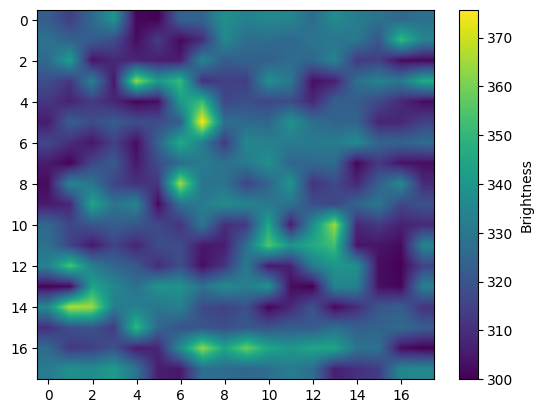

'The dimensions of the truncated matrix are (18, 18)'

In [17]:
# Extract the 'brightness' column and drop any null values
brightness_data = df['brightness'].dropna().values

# Calculate the dimensions for the square matrix
dim_non_null_brightness = int(math.sqrt(len(brightness_data)))

# Truncate the data to fit into a square matrix
truncated_brightness_data = brightness_data[:dim_non_null_brightness * dim_non_null_brightness]

# Reshape the truncated data into a square matrix
truncated_brightness_matrix = truncated_brightness_data.reshape(dim_non_null_brightness, dim_non_null_brightness)

# Create the plot using imshow() with smooth interpolation
plt.imshow(truncated_brightness_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Brightness')

# Show the plot
plt.show()

# Print the dimensions of the truncated matrix
f"The dimensions of the truncated matrix are {truncated_brightness_matrix.shape}"



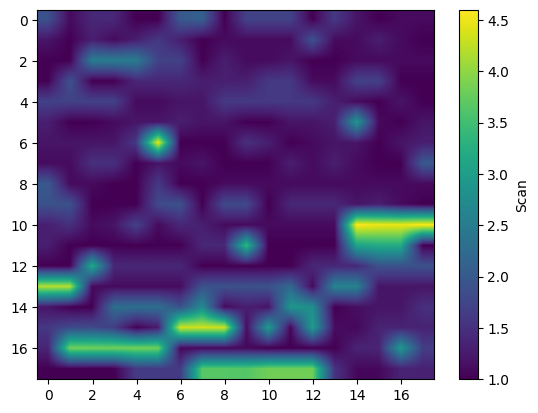

The dimensions of the non-null matrix are (18, 18)


In [18]:
# Extraer la columna 'confidence'
confidence_data = df['scan']

# Contar el número total de datos no nulos en "confidence"
total_non_null_data_confidence = confidence_data.dropna().shape[0]

# Calcular una dimensión cuadrada que sea la raíz cuadrada más cercana al número total de datos no nulos
dim_non_null_confidence = int(math.sqrt(total_non_null_data_confidence))

# Redimensionar los datos no nulos para que se ajusten a una matriz cuadrada, truncando los datos adicionales
non_null_confidence_matrix = confidence_data.dropna().values[:dim_non_null_confidence * dim_non_null_confidence].reshape(dim_non_null_confidence, dim_non_null_confidence)

# Crear el gráfico usando imshow() con interpolación suave
plt.imshow(non_null_confidence_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Agregar una barra de colores a un lado
plt.colorbar(label='Scan')

# Mostrar el gráfico
plt.show()

# Imprimir las dimensiones de la matriz no nula
print(f"The dimensions of the non-null matrix are {non_null_confidence_matrix.shape}")

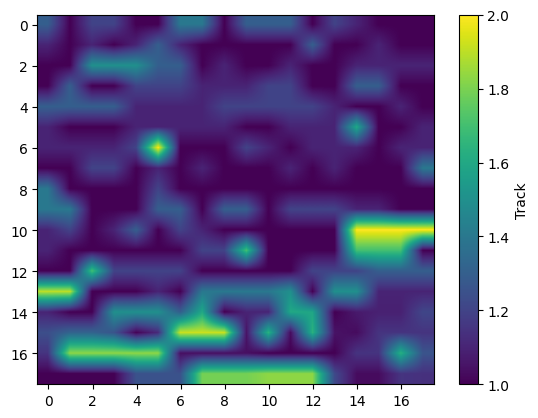

The dimensions of the non-null matrix are (18, 18)


In [19]:
# Extraer la columna 'confidence'
confidence_data = df['track']

# Contar el número total de datos no nulos en "confidence"
total_non_null_data_confidence = confidence_data.dropna().shape[0]

# Calcular una dimensión cuadrada que sea la raíz cuadrada más cercana al número total de datos no nulos
dim_non_null_confidence = int(math.sqrt(total_non_null_data_confidence))

# Redimensionar los datos no nulos para que se ajusten a una matriz cuadrada, truncando los datos adicionales
non_null_confidence_matrix = confidence_data.dropna().values[:dim_non_null_confidence * dim_non_null_confidence].reshape(dim_non_null_confidence, dim_non_null_confidence)

# Crear el gráfico usando imshow() con interpolación suave
plt.imshow(non_null_confidence_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Agregar una barra de colores a un lado
plt.colorbar(label='Track')

# Mostrar el gráfico
plt.show()

# Imprimir las dimensiones de la matriz no nula
print(f"The dimensions of the non-null matrix are {non_null_confidence_matrix.shape}")

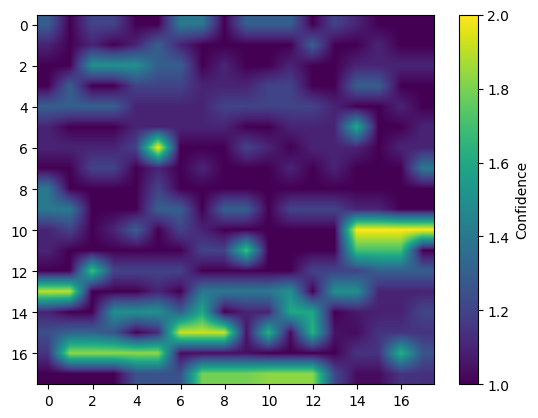

The dimensions of the non-null matrix are (18, 18)


In [20]:
# Since we've already calculated the non-null confidence matrix earlier, let's plot it again for reference.

# Create the plot using imshow() with smooth interpolation
plt.imshow(non_null_confidence_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Confidence')

# Show the plot
plt.show()

# Print the dimensions of the non-null matrix
print(f"The dimensions of the non-null matrix are {non_null_confidence_matrix.shape}")



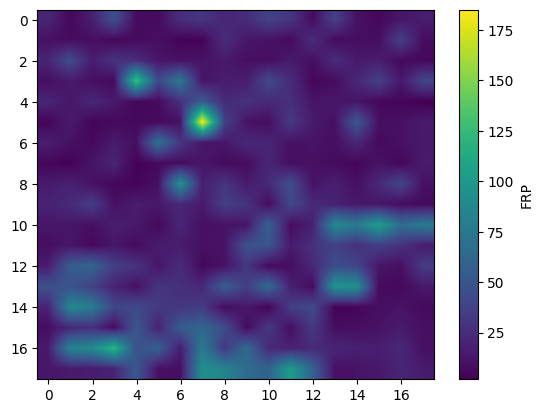

The dimensions of the matrix are (18, 18)


In [21]:
# Extract the 'frp' column and drop NaN values
frp_data = df['frp'].dropna()

# Count the total number of data in 'frp'
total_data_frp = len(frp_data)

# Calculate a square dimension that is the closest square root to the total number of data
dim_frp = int(math.sqrt(total_data_frp))

# Ensure the data is a NumPy array, then resize it to fit into a square matrix, truncating any extra data
if isinstance(frp_data, pd.Series):
    frp_data = frp_data.to_numpy()

frp_matrix = frp_data[:dim_frp * dim_frp].reshape(dim_frp, dim_frp)

# Create the plot using imshow() with smooth interpolation
plt.imshow(frp_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='FRP')

# Show the plot
plt.show()

# Print the dimensions of the matrix
print(f"The dimensions of the matrix are {frp_matrix.shape}")


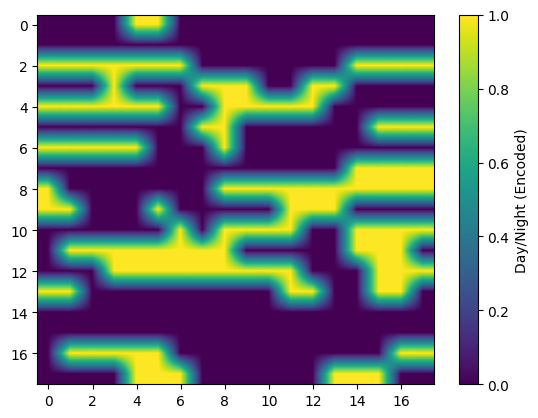

The dimensions of the matrix are (18, 18)


In [22]:
from sklearn.preprocessing import LabelEncoder
# Extract the 'daynight' column and drop NaN values
daynight_data = df['daynight'].dropna()

# Since 'daynight' is a categorical column, encode it
label_encoder = LabelEncoder()
daynight_data_encoded = label_encoder.fit_transform(daynight_data)

# Count the total number of data in 'daynight'
total_data_daynight = len(daynight_data_encoded)

# Calculate a square dimension that is the closest square root to the total number of data
dim_daynight = int(math.sqrt(total_data_daynight))

# Resize the data to fit into a square matrix, truncating any extra data
daynight_matrix = daynight_data_encoded[:dim_daynight * dim_daynight].reshape(dim_daynight, dim_daynight)

# Create the plot using imshow() with smooth interpolation
plt.imshow(daynight_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Day/Night (Encoded)')

# Show the plot
plt.show()

# Print the dimensions of the matrix
print(f"The dimensions of the matrix are {daynight_matrix.shape}")


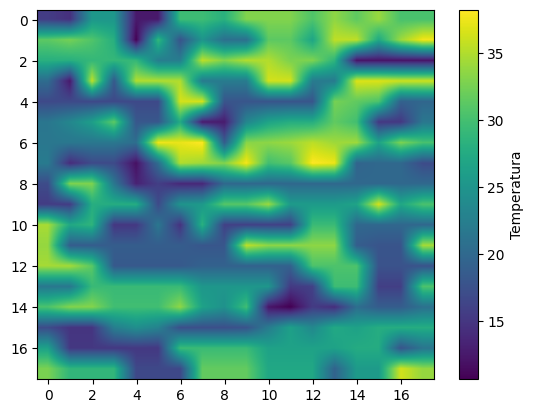

The dimensions of the matrix are (18, 18)


In [23]:
# Extract the 'temperatura' column and drop NaN values
temperatura_data = df['temperatura'].dropna()

# Count the total number of data in 'temperatura'
total_data_temperatura = len(temperatura_data)

# Calculate a square dimension that is the closest square root to the total number of data
dim_temperatura = int(math.sqrt(total_data_temperatura))

# Ensure the data is a NumPy array, then resize it to fit into a square matrix, truncating any extra data
if isinstance(temperatura_data, pd.Series):
    temperatura_data = temperatura_data.to_numpy()

temperatura_matrix = temperatura_data[:dim_temperatura * dim_temperatura].reshape(dim_temperatura, dim_temperatura)

# Create the plot using imshow() with smooth interpolation
plt.imshow(temperatura_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Temperatura')

# Show the plot
plt.show()

# Print the dimensions of the matrix
print(f"The dimensions of the matrix are {temperatura_matrix.shape}")


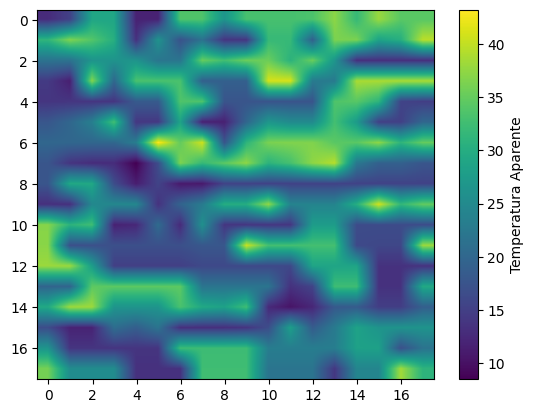

The dimensions of the matrix are (18, 18)


In [24]:
# Extract the 'temperatura_aparente' column and drop NaN values
temperatura_aparente_data = df['temperatura_aparente'].dropna()

# Count the total number of data in 'temperatura_aparente'
total_data_temperatura_aparente = len(temperatura_aparente_data)

# Calculate a square dimension that is the closest square root to the total number of data
dim_temperatura_aparente = int(math.sqrt(total_data_temperatura_aparente))

# Ensure the data is a NumPy array, then resize it to fit into a square matrix, truncating any extra data
if isinstance(temperatura_aparente_data, pd.Series):
    temperatura_aparente_data = temperatura_aparente_data.to_numpy()

temperatura_aparente_matrix = temperatura_aparente_data[:dim_temperatura_aparente * dim_temperatura_aparente].reshape(dim_temperatura_aparente, dim_temperatura_aparente)

# Create the plot using imshow() with smooth interpolation
plt.imshow(temperatura_aparente_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Temperatura Aparente')

# Show the plot
plt.show()

# Print the dimensions of the matrix
print(f"The dimensions of the matrix are {temperatura_aparente_matrix.shape}")


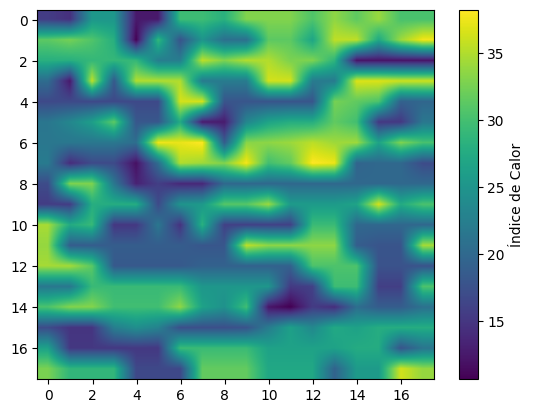

The dimensions of the matrix are (18, 18)


In [25]:
# Extract the 'indice_calor' column and drop NaN values
indice_calor_data = df['indice_calor'].dropna()

# Count the total number of data in 'indice_calor'
total_data_indice_calor = len(indice_calor_data)

# Calculate a square dimension that is the closest square root to the total number of data
dim_indice_calor = int(math.sqrt(total_data_indice_calor))

# Ensure the data is a NumPy array, then resize it to fit into a square matrix, truncating any extra data
if isinstance(indice_calor_data, pd.Series):
    indice_calor_data = indice_calor_data.to_numpy()

indice_calor_matrix = indice_calor_data[:dim_indice_calor * dim_indice_calor].reshape(dim_indice_calor, dim_indice_calor)

# Create the plot using imshow() with smooth interpolation
plt.imshow(indice_calor_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Índice de Calor')

# Show the plot
plt.show()

# Print the dimensions of the matrix
print(f"The dimensions of the matrix are {indice_calor_matrix.shape}")


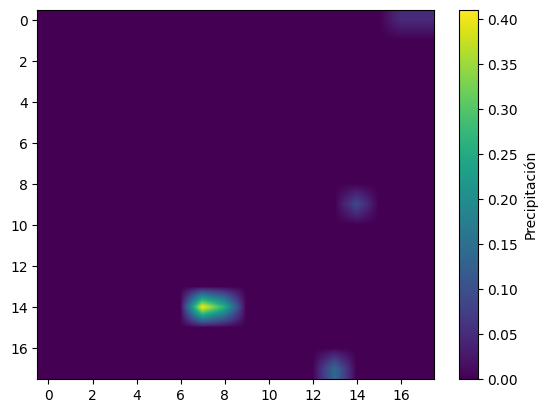

The dimensions of the matrix are (18, 18)


In [26]:
# Extract the 'precipitacion' column and drop NaN values
precipitacion_data = df['precipitacion'].dropna()

# Count the total number of data in 'precipitacion'
total_data_precipitacion = len(precipitacion_data)

# Calculate a square dimension that is the closest square root to the total number of data
dim_precipitacion = int(math.sqrt(total_data_precipitacion))

# Ensure the data is a NumPy array, then resize it to fit into a square matrix, truncating any extra data
if isinstance(precipitacion_data, pd.Series):
    precipitacion_data = precipitacion_data.to_numpy()

precipitacion_matrix = precipitacion_data[:dim_precipitacion * dim_precipitacion].reshape(dim_precipitacion, dim_precipitacion)

# Create the plot using imshow() with smooth interpolation
plt.imshow(precipitacion_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Precipitación')

# Show the plot
plt.show()

# Print the dimensions of the matrix
print(f"The dimensions of the matrix are {precipitacion_matrix.shape}")


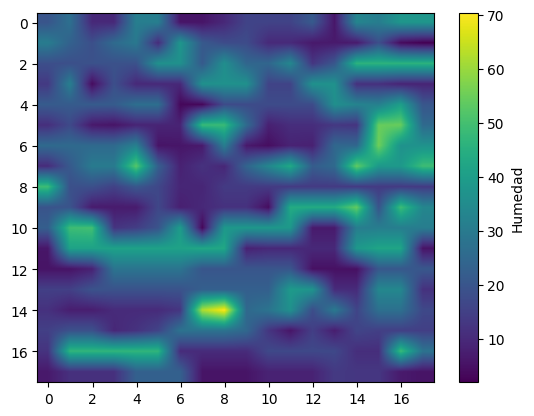

The dimensions of the matrix are (18, 18)


In [27]:
# Extract the 'humedad' column and drop NaN values
humedad_data = df['humedad'].dropna()

# Count the total number of data in 'humedad'
total_data_humedad = len(humedad_data)

# Calculate a square dimension that is the closest square root to the total number of data
dim_humedad = int(math.sqrt(total_data_humedad))

# Ensure the data is a NumPy array, then resize it to fit into a square matrix, truncating any extra data
if isinstance(humedad_data, pd.Series):
    humedad_data = humedad_data.to_numpy()

humedad_matrix = humedad_data[:dim_humedad * dim_humedad].reshape(dim_humedad, dim_humedad)

# Create the plot using imshow() with smooth interpolation
plt.imshow(humedad_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Humedad')

# Show the plot
plt.show()

# Print the dimensions of the matrix
print(f"The dimensions of the matrix are {humedad_matrix.shape}")


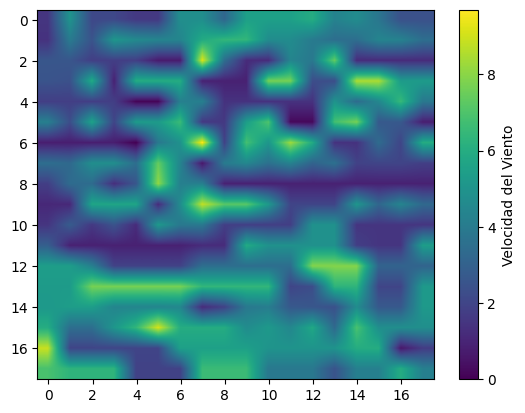

The dimensions of the matrix are (18, 18)


In [28]:
# Extract the 'velocidad_viento' column and drop NaN values
velocidad_viento_data = df['velocidad_viento'].dropna()

# Count the total number of data in 'velocidad_viento'
total_data_velocidad_viento = len(velocidad_viento_data)

# Calculate a square dimension that is the closest square root to the total number of data
dim_velocidad_viento = int(math.sqrt(total_data_velocidad_viento))

# Ensure the data is a NumPy array, then resize it to fit into a square matrix, truncating any extra data
if isinstance(velocidad_viento_data, pd.Series):
    velocidad_viento_data = velocidad_viento_data.to_numpy()

velocidad_viento_matrix = velocidad_viento_data[:dim_velocidad_viento * dim_velocidad_viento].reshape(dim_velocidad_viento, dim_velocidad_viento)

# Create the plot using imshow() with smooth interpolation
plt.imshow(velocidad_viento_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Velocidad del Viento')

# Show the plot
plt.show()

# Print the dimensions of the matrix
print(f"The dimensions of the matrix are {velocidad_viento_matrix.shape}")


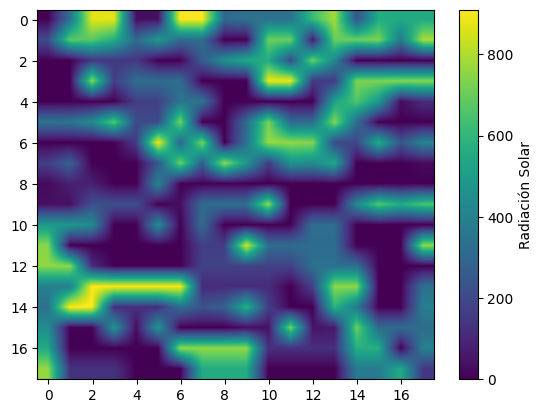

The dimensions of the matrix are (18, 18)


In [29]:
# Extract the 'radiacion_solar' column and drop NaN values
radiacion_solar_data = df['radiacion_solar'].dropna()

# Count the total number of data in 'radiacion_solar'
total_data_radiacion_solar = len(radiacion_solar_data)

# Calculate a square dimension that is the closest square root to the total number of data
dim_radiacion_solar = int(math.sqrt(total_data_radiacion_solar))

# Ensure the data is a NumPy array, then resize it to fit into a square matrix, truncating any extra data
if isinstance(radiacion_solar_data, pd.Series):
    radiacion_solar_data = radiacion_solar_data.to_numpy()

radiacion_solar_matrix = radiacion_solar_data[:dim_radiacion_solar * dim_radiacion_solar].reshape(dim_radiacion_solar, dim_radiacion_solar)

# Create the plot using imshow() with smooth interpolation
plt.imshow(radiacion_solar_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Radiación Solar')

# Show the plot
plt.show()

# Print the dimensions of the matrix
print(f"The dimensions of the matrix are {radiacion_solar_matrix.shape}")


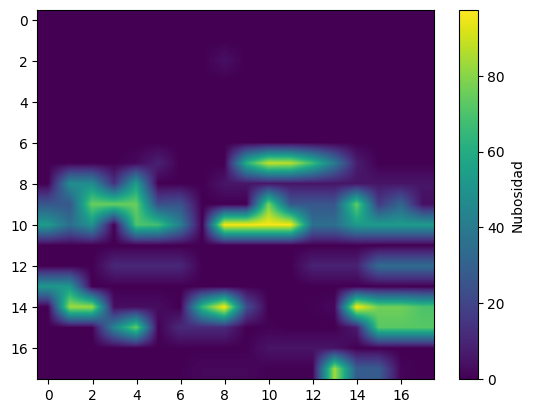

The dimensions of the matrix are (18, 18)


In [30]:
# Extract the 'nubosidad' column and drop NaN values
nubosidad_data = df['nubosidad'].dropna()

# Count the total number of data in 'nubosidad'
total_data_nubosidad = len(nubosidad_data)

# Calculate a square dimension that is the closest square root to the total number of data
dim_nubosidad = int(math.sqrt(total_data_nubosidad))

# Ensure the data is a NumPy array, then resize it to fit into a square matrix, truncating any extra data
if isinstance(nubosidad_data, pd.Series):
    nubosidad_data = nubosidad_data.to_numpy()

nubosidad_matrix = nubosidad_data[:dim_nubosidad * dim_nubosidad].reshape(dim_nubosidad, dim_nubosidad)

# Create the plot using imshow() with smooth interpolation
plt.imshow(nubosidad_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Nubosidad')

# Show the plot
plt.show()

# Print the dimensions of the matrix
print(f"The dimensions of the matrix are {nubosidad_matrix.shape}")


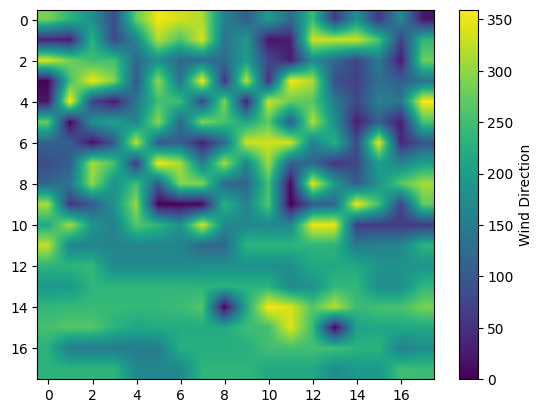

The dimensions of the matrix are (18, 18)


In [31]:
# Extract the 'wind_direction' column and drop NaN values
wind_direction_data = df['wind_direction'].dropna()

# Count the total number of data in 'wind_direction'
total_data_wind_direction = len(wind_direction_data)

# Calculate a square dimension that is the closest square root to the total number of data
dim_wind_direction = int(math.sqrt(total_data_wind_direction))

# Ensure the data is a NumPy array, then resize it to fit into a square matrix, truncating any extra data
if isinstance(wind_direction_data, pd.Series):
    wind_direction_data = wind_direction_data.to_numpy()

wind_direction_matrix = wind_direction_data[:dim_wind_direction * dim_wind_direction].reshape(dim_wind_direction, dim_wind_direction)

# Create the plot using imshow() with smooth interpolation
plt.imshow(wind_direction_matrix, cmap='viridis', interpolation='bilinear', aspect='auto')

# Add a color bar on the side
plt.colorbar(label='Wind Direction')

# Show the plot
plt.show()

# Print the dimensions of the matrix
print(f"The dimensions of the matrix are {wind_direction_matrix.shape}")


The bar graph above shows the frequency of data points specifically for the Aqua and Terra satellites in the original dataset. This gives us a focused view on how many data points are attributed to each of these two satellites.

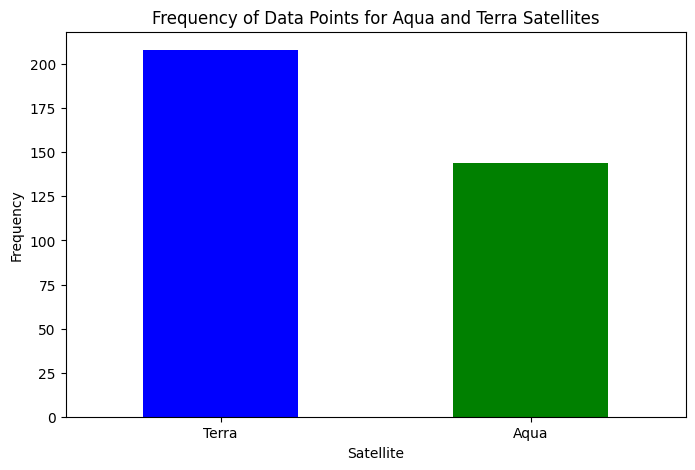

In [32]:
# Filter the data to include only 'Aqua' and 'Terra' in the 'satellite' column
filtered_satellite_data = df[df['satellite'].isin(['Aqua', 'Terra'])]

# Check the frequency of 'Aqua' and 'Terra'
filtered_satellite_frequency = filtered_satellite_data['satellite'].value_counts()

# Plotting the frequency of 'Aqua' and 'Terra'
plt.figure(figsize=(8, 5))
filtered_satellite_frequency.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Satellite')
plt.ylabel('Frequency')
plt.title('Frequency of Data Points for Aqua and Terra Satellites')
plt.xticks(rotation=0)
plt.show()


The bar graph above shows the frequency of data points for each hour in the dataset. This allows us to see how many data points are collected at different hours of the day thorught 2016 and 2023. This show us that most of the time wildfires present at 18:00 and 20:00.

In [ ]:
# Since 'hora' exists in the new dataset, let's proceed to plot its frequency.
hora_frequency = df['hora'].value_counts().sort_index()

# Plotting the frequency of each unique value in the 'hora' column
plt.figure(figsize=(12, 6))
hora_frequency.plot(kind='bar', color='purple')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency of Data Points per Hour')
plt.xticks(rotation=0)
plt.show()


The wind rose plot provides a visual summary of wind patterns, highlighting both the frequency and direction of wind occurrences. In this specific plot, the length or density of each "petal" points to how often the wind blows from a particular cardinal direction, such as North or South. By identifying the longest or densest petals, we can discern the dominant wind directions, offering valuable insights for applications like renewable energy sourcing, aviation, or agriculture. Short or sparse petals indicate directions from which the wind rarely comes, helping to identify any directional biases or gaps in wind activity.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extraer la columna 'wind_direction' (Dirección del Viento)
wind_direction_data = filtered_df['wind_direction']

# Filtrar valores no nulos y convertir a números
wind_direction_data = wind_direction_data.dropna()
wind_direction_degrees = pd.to_numeric(wind_direction_data, errors='coerce')
wind_direction_degrees = wind_direction_degrees.dropna()

# Convertir la dirección del viento en radianes
wind_direction_rad = np.radians(wind_direction_degrees)

# Crear un gráfico de rosa de los vientos
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Crear un histograma de la dirección del viento
n, bins, patches = plt.hist(wind_direction_rad, bins=36, density=True, alpha=0.75)

# Añadir etiquetas a los sectores
direction_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                    'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW', 'N']
ax.set_xticks(np.radians(range(0, 360, 360 // len(direction_labels) + 1)))  # +1 para igualar el número de etiquetas y sectores
ax.set_xticklabels(direction_labels)

# Agregar un título
plt.title('Rosa de los Vientos - Dirección del Viento')

# Mostrar el gráfico
plt.show()

The boxplot above represents the distribution of the 'brightness' values in the original dataset. The central box shows the interquartile range (IQR), which contains the middle 50% of the data. The line within the box indicates the median value of 'brightness', effectively dividing the data into two equal halves. The "whiskers" extending from the box indicate the range within which the bulk of the values fall, and any data points outside of these whiskers could be considered outliers. This plot is helpful for understanding the spread, central tendency, and potential outliers in the 'brightness' data.

In [ ]:
# Remove 'Incendio' from the list of selected columns, if it exists
if 'Incendio' in selected_columns:
    selected_columns.remove('Incendio')

# Filter the dataset to include only the selected columns
filtered_data_for_boxplot = df[selected_columns]

# For categorical columns like 'satellite' and 'daynight', convert them to category type for better boxplot visualization
categorical_columns = ['satellite', 'daynight']
filtered_data_for_boxplot[categorical_columns] = filtered_data_for_boxplot[categorical_columns].astype('category')

# Re-define the list of numeric columns based on the filtered dataset
numeric_columns = filtered_data_for_boxplot.select_dtypes(include=[np.number]).columns.tolist()

# Create vertical boxplots in a grid for the numeric and selected categorical columns
plt.figure(figsize=(20, 30))
for i, column in enumerate(numeric_columns + categorical_columns_for_boxplot, 1):
    plt.subplot(7, 3, i)  # Adjusted the grid size to fit the additional plots
    if column in categorical_columns_for_boxplot:
        sns.boxplot(x=column, y='brightness', data=filtered_data_for_boxplot)
        plt.title(f'Boxplot of Brightness by {column}')
        if column == 'hora':  # Rotate x-axis labels for better visibility
            plt.xticks(rotation=90)
    else:
        sns.boxplot(y=filtered_data_for_boxplot[column])
        plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()



# **GENERACION DE MAPAS DE CALOR**

In [ ]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('DataSet23.csv', parse_dates=['Datetime'])

# Muestra el dataframe
print(df)


Datos minimos y maximos

In [ ]:
# Calculate the minimum and maximum latitude and longitude
latMin = df["latitude"].min()
latMax = df["latitude"].max()
lonMin = df["longitude"].min()
lonMax = df["longitude"].max()

# Define the grid size in degrees
grados = 0.05

print("Latitud minima en los datos: "+str(latMin))
print("Latitud maxima en los datos: "+str(latMax))
print("Longitud minima en los datos: "+str(lonMin))
print("Longitud maxima en los datos: "+str(lonMax))


grados=(0.05)#grados del tamaño de cuadricula 0.009 aprox 1 km  (1/111.1)
print("Resolucion en grados: "+str(grados))


Se calculan las dimensiones en funcion de la latitud y la longitud

In [ ]:
import math

# Calculate the length of the grid in the y-axis (latitude)
yLen = math.ceil((latMax - latMin) / 0.045 + 1)

# Calculate the length of the grid in the x-axis (longitude)
xLen = math.ceil(abs((lonMin - lonMax) / 0.045 - 1))

(yLen, xLen)


Se calculas las coordenadas de la cuadricula X y Y para cada putno de datos y las he almacenado en nuevas columnas en el DataFrame. Las columnas X y Y han sido convertidas a enteros.

In [ ]:
# Calculate the grid coordinates for each data point and store them in new columns 'x' and 'y'
df["y"] = ((latMax - df["latitude"]) / grados)
df["x"] = ((abs(lonMin - df["longitude"])) / grados)

# Convert the 'x' and 'y' columns to integers
df = df.astype({'x': 'int', 'y': 'int'})

# Show the first few rows of the dataframe to confirm the new columns
df.head()


DataSet

In [ ]:
df

Este código agrupa los datos tanto por hora como por día. De esta manera, podemos entender cuántos registros tenemos en cada intervalo de tiempo. vPh nos da el conteo por hora, y vPd nos da el conteo por día.

In [ ]:
# Group the records by hour and by day
vPh = df.groupby([pd.Grouper(key='Datetime', freq='H')]).size().reset_index(name='count')



In [ ]:
vPd = df.groupby([pd.Grouper(key='Datetime', freq='D')]).size().reset_index(name='count')



In [ ]:
# Show the first few rows of the dataframe grouped by hour to confirm its structure
vPh.head()

In [ ]:
vPh

In [ ]:
vPd

Este código muestra las primeras filas del DataFrame valoresPorHora, que contiene los datos agrupados por hora y coordenadas X y Y. Esto nos da una visión rápida de cómo se ven los datos después del agrupamiento, permitiéndonos confirmar que la estructura del DataFrame es la que esperamos.

In [ ]:
# Group the records by hour, x, and y coordinates, then count the number of records for each group
valoresPorHora = df.groupby([pd.Grouper(key='Datetime', freq='H'), 'x', 'y']).size().reset_index(name='count')


In [ ]:
# Show the first few rows of the dataframe to confirm its structure
valoresPorHora.head()

Este bloque de código crea una lista de matrices, donde cada matriz representa los datos de una hora específica desde el 24 de febrero de 2016 hasta el 6 de enero de 2023. Cada matriz tiene dimensiones basadas en las longitudes X y Y calculadas previamente.

Dentro de cada matriz, la celda en la posición (y,x) muestra el número de registros en esa ubicación específica y para esa hora específica. Por ejemplo, si hay 5 incendios registrados en una ubicación específica a las 3 PM de un día determinado, entonces la matriz correspondiente a esa hora tendrá un '5' en la celda que representa esa ubicación.

Finalmente, el código muestra la primera matriz generada para verificar que todo funcionó como se esperaba.

In [ ]:
from datetime import datetime, timedelta
import numpy as np

# Initialize start and end times for the loop
start_time = datetime(2016, 2, 24, 21, 0)
end_time = datetime(2023, 9, 19, 4, 0)


# Initialize an empty list to store matrices
matrices = []

# Loop through each hour between start_time and end_time
while start_time < end_time:
    # Filter the DataFrame for records corresponding to the current hour
    temp = valoresPorHora[valoresPorHora["Datetime"] == start_time]

    # Initialize a zeros matrix of dimensions (yLen, xLen)
    a = np.zeros((yLen, xLen))

    # If there are records for the current hour, populate the matrix
    if len(temp) > 0:
        for index, row in temp.iterrows():
            a[row["y"], row["x"]] = row["count"]

    # Append the matrix to the list
    matrices.append(a)

    # Increment start_time by one hour
    start_time += timedelta(hours=1)

# Show the first matrix for verification
matrices[0] if matrices else "No matrices generated"


Este bloque de código calcula la suma total de valores contenidos en las matrices generadas durante el análisis. Cada matriz representa la actividad registrada en una hora específica dentro de un rango de fechas. El código recorre todas las matrices, suma los valores en cada una y muestra el resultado total.

In [ ]:
# Initialize an empty numpy array to store the values
valores = np.array([])

# Loop through each matrix in the 'matrices' list
for i in range(len(matrices)):
    # Calculate the sum of values in the current matrix and append it to 'valores'
    valores = np.append(valores, matrices[i].sum())

# Calculate the sum of all the values in 'valores'
total_sum = valores.sum()

# Display the total sum
total_sum


Este bloque de código analiza una lista de valores y separa aquellos que son iguales a cero de los que no lo son. Los índices de los valores iguales a cero se almacenan en la lista zeroVal, mientras que los índices de los valores distintos de cero se almacenan en la lista valIndex. Esto permite identificar y gestionar los valores nulos o ceros en los datos.

In [ ]:
%%time
zeroVal = []
valIndex = []

# Loop through each value in 'valores'
for i in range(len(valores)):
    if valores[i] == 0:
        zeroVal.append(i)
    else:
        valIndex.append(i)


En este segmento, se está calculando la longitud de dos listas:

len(zeroVal) devuelve el número de elementos en la lista zeroVal. Esta lista contiene los índices de los valores en la lista original que son iguales a cero.

len(valIndex) devuelve el número de elementos en la lista valIndex. Esta lista contiene los índices de los valores en la lista original que no son iguales a cero.

En el resultado mostrado, len(zeroVal) tiene un valor de 66116, lo que significa que hay 25443 valores en la lista original que son 203 iguales a cero. Por otro lado, len(valIndex) no se muestra en tu mensaje, pero representaría la cantidad de valores que no son cero en la lista original.

Estas operaciones ayudan a cuantificar la cantidad de ceros y valores distintos de cero en los datos analizados.

In [ ]:
len(zeroVal)

In [ ]:
len(valIndex)

El resultado de t igual a 0 tiene sentido en este contexto. Significa que los datos no se encontraron secuencias de 20 valores no nulos (distintos de cero) consecutivos donde el siguiente valor sea igual al valor actual más 20. En otras palabras, no se encontraron patrones específicos en tus datos que cumplan con esta condición durante la ejecución del bucle.

Dado que t se inicializa en 0 y solo se incrementa cuando se cumple la condición mencionada, si no se cumple esa condición, t permanecerá en 0.








In [ ]:
# Generate the heatmap with a custom color palette ranging from red to yellow
plt.figure(figsize=(12, 10))
sns.histplot(df, x="longitude", y="latitude", bins=50, cmap="YlOrRd", cbar=True, cbar_kws={'label': 'Frequency of Fires'})
plt.title('Heatmap of Fires Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# **GENERACION DE MAPAS DE HORAS DE MAYOR FRECUENCIA**


Se importan las librerias

In [ ]:
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import copy
import os, datetime
from shapely.geometry.polygon import Polygon, Point
from dateutil.rrule import rrule, MONTHLY
from dateutil.parser import parse

import folium
import matplotlib.colors as colors
from branca.element import Figure

Se adapta un análisis geoespacial originalmente diseñado para un gran conjunto de datos. El objetivo es filtrar puntos geográficos dentro de un polígono definido, calcular la hora más frecuente en la que ocurren eventos en esos puntos y visualizar los resultados en mapas mensuales. El conjunto de datos tiene 352 registros y contiene columnas relevantes como 'latitude', 'longitude', y 'Datetime'.


In [ ]:
# Let's start by reading the uploaded CSV file and showing its basic information to understand its structure.
import pandas as pd

# Read the CSV file
df = pd.read_csv('DataSet23.csv', parse_dates=True, infer_datetime_format=True)

# Show the basic information about the DataFrame
df.info()


Este fragmento de código utiliza NumPy para generar un conjunto de puntos geográficos. Se establecen intervalos y límites para la latitud y la longitud. Luego, se crean listas de intervalos y se generan puntos combinando estos intervalos. Al final, se imprime la cantidad de intervalos y el número total de puntos generados.


In [ ]:
# Importing numpy for numerical operations
import numpy as np

# Setting the interval and boundaries for latitude and longitude
intervalo = 0.05
latMin = 30.7387
latMax = 31.3099
lonMin = -111.23656
lonMax = -110.6363

# Creating intervals for latitude and longitude
latInterval = np.arange(latMin, latMax, intervalo * 2)
lonInterval = np.arange(abs(lonMax), abs(lonMin), intervalo * 2)

# Generating points based on the latitude and longitude intervals
points = []
for i in latInterval:
    for j in lonInterval:
        points.append([-j, i])

# Print the lengths of the latitude and longitude intervals and the total number of points
len(latInterval), len(lonInterval), len(points)


Este fragmento de código utiliza Matplotlib para trazar un polígono y puntos de datos en un gráfico 2D. Primero, se definen las coordenadas de los vértices del polígono. Luego, se crea una 'lista cerrada' repitiendo el primer punto al final. Se extraen las coordenadas x e y para el trazado. Finalmente, se traza el polígono y se superponen los puntos de datos del conjunto de datos en el mismo gráfico, marcados en rojo.


In [ ]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt



# Plotting the polygon
plt.figure()
plt.scatter(df['longitude'], df['latitude'], c='red', s=10)  # plot the data points from the dataset
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Data Points')
plt.show()


Este fragmento de código extrae la fecha de inicio y de fin del conjunto de datos para determinar el rango de tiempo del análisis. Además, establece una variable de 'distancia' utilizando un 'intervalo' previamente definido. Estas variables se utilizarán para futuros análisis y filtrados en el notebook.


In [ ]:
# Importing the dateutil parser to convert string to datetime object
from dateutil.parser import parse

# Parsing the 'fecha' column to get the start and end dates
fecha_inicio = parse(df["fecha"][0])
fecha_fin = parse(df["fecha"].iloc[-1])  # Using iloc for better readability

# Using the intervalo defined earlier for distancia
distancia = intervalo


Este fragmento de código realiza un análisis geotemporal. Itera a través de cada mes en un rango de fechas y, para cada mes, examina una lista de puntos geográficos. Para cada punto, el código busca eventos cercanos en el conjunto de datos y determina la hora más frecuente de esos eventos. Los resultados se almacenan en una lista de listas, donde cada sublista contiene las horas más frecuentes para todos los puntos en un mes específico.


In [ ]:
%%time
from dateutil.rrule import rrule, MONTHLY
import pandas as pd
import numpy as np
from datetime import datetime

# Convert 'fecha' and 'hora' to a single datetime column
df['Datetime'] = pd.to_datetime(df['fecha'] + ' ' + df['hora'])

# Initialize an empty list to store the records
registros = []

# Loop through each month between the start and end date
for fecha in rrule(MONTHLY, dtstart=fecha_inicio, until=fecha_fin):

    # Filter the DataFrame to only include records within the current month
    dfTemp = df[(df['Datetime'] >= fecha) & (df['Datetime'] < fecha + pd.DateOffset(months=1))]
    row = []

    # Loop through each point in the list of points
    for iRow in points:

        # Find records that are close to the current point based on the 'distancia'
        cercanos = dfTemp.loc[np.sqrt((dfTemp['latitude'] - iRow[1])**2 + (dfTemp['longitude'] - iRow[0])**2) < distancia]

        # Find the most frequent hour if there are any nearby records
        if len(cercanos) != 0:
            horaMax = cercanos['Datetime'].groupby(cercanos['Datetime'].dt.hour).count().idxmax()
        else:
            horaMax = -1
        row.append(horaMax)

    registros.append(row)


Este fragmento de código toma una copia profunda de la lista original de puntos geográficos y la almacena en una nueva lista. Luego, para cada mes y cada punto en esta nueva lista, añade la hora más frecuente de eventos cercanos. Estos datos de hora más frecuente se extraen de la lista 'registros', que se generó en un paso anterior. Al final, cada punto en la lista copiada tendrá múltiples horas más frecuentes, una para cada mes analizado.


In [ ]:
%%time
import copy

# Deep copy the original points list
pointsCopy = copy.deepcopy(points)

# Loop through each month in the 'registros' list
for mes in range(len(registros)):
    y = 0
    # Loop through each point in the deep-copied list
    for i in pointsCopy:
        # Append the most frequent hour for that point in that month
        i.append(registros[mes][y])
        y += 1


Este fragmento de código imprime un resumen de la información clave del análisis geotemporal. Muestra el número total de coordenadas analizadas, el número de meses incluidos en el estudio, las fechas de inicio y finalización del período de análisis, y la distancia máxima en grados utilizada para el filtrado espacial.


In [ ]:
print("Resumen de la información:")
print("Coordenadas: " + str(len(pointsCopy)))
print("Meses: " + str(len(registros)))

print("Fecha inicial: " + str(fecha_inicio))
print("Fecha final: " + str(fecha_fin))

print("Distancia máxima en grados: " + str(distancia))


Este fragmento de código crea un nuevo directorio para almacenar los resultados del análisis. El nombre del directorio incluye la fecha y hora actual para asegurar que sea único. Si el directorio no existe, el código lo crea automáticamente.


In [ ]:
import os
import datetime

# Create a unique directory path based on the current date and time
path = './Resultados/' + datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# Create the directory if it doesn't exist
if not os.path.exists(path):
    os.makedirs(path)

path


Este fragmento de código define dos variables importantes para el análisis. La variable 'radioMetros' establece un radio de 9000 metros que se utilizará en cálculos geográficos. La lista 'meses' contiene los nombres de los meses en español, que se usarán para etiquetar resultados en análisis temporales.


In [ ]:
# Define the radius in meters for geographical calculations
radioMetros = 9000

# Define a list of month names in Spanish
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]


Este fragmento de código utiliza la biblioteca Folium para crear mapas interactivos. Para cada mes en el conjunto de datos, genera un nuevo mapa que muestra puntos de interés representados por círculos y marcadores. Los círculos se colorean según una escala de colores que representa la hora más frecuente de eventos cercanos a cada punto. El mapa para cada mes se guarda como un archivo HTML en un directorio específico.

La escala de colores representa la hora más frecuente de eventos cercanos a cada punto de interés para un mes determinado. El código utiliza una escala lineal de colores que va desde 0 a 23, correspondiendo a las 24 horas del día.

Por ejemplo, si el color de un círculo en el mapa es verde y la escala de colores indica que el verde corresponde al valor 15, eso significa que para ese punto geográfico y mes específicos, la mayoría de los eventos cercanos ocurrieron a las 15:00 horas.

La escala de colores proporciona una manera visualmente efectiva de identificar patrones temporales en los datos geográficos.


In [ ]:
import folium
from branca.element import Figure
import branca.colormap as cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



# Create a colormap
colors = cm.LinearColormap([mcolors.rgb2hex(rgba) for rgba in plt.cm.Spectral(np.linspace(0, 1, 24))], vmin=0, vmax=23, max_labels=24)



# Define the points of interest as an array of coordinates
puntos_de_interes = pointsCopy

# Add the points of interest to the map
for mes in range(len(puntos_de_interes[0]) - 2):

    # Initialize a new folium map
    mapa = folium.Map(location=[27.0862, -107.41912], zoom_start=7)

    for punto in puntos_de_interes:
        if punto[mes + 2] != -1:
            # Add a circle for each point of interest
            circle = folium.Circle(
                location=[punto[1], punto[0]],
                radius=radioMetros,
                color=colors(punto[mes + 2]),
                fill=True,
                fill_color=colors(punto[mes + 2])
            )

            # Add a marker for each point of interest
            folium.Marker(
                location=[punto[1], punto[0]],
                icon=folium.DivIcon(html=f"""<div style="text-align:center; width: 10px; color: black;">{punto[mes+2]}</div>""")
            ).add_to(mapa)

            # Add the circle to the map
            circle.add_to(mapa)

    # Add the colormap to the map
    colors.caption = 'Color Scale'
    mapa.add_child(colors)

    # Save the map
    fig = Figure(width=1000, height=1200)
    fig.add_child(mapa)
    mapa.save(path + "/map_" + str(2015 + (mes // 12)) + "_" + str(meses[mes % 12]) + ".html")



Este fragmento de código crea un resumen textual de la información clave relacionada con el análisis geotemporal. El resumen incluye detalles como el número total de coordenadas analizadas, el rango de tiempo cubierto, la distancia máxima en grados utilizada para el filtrado espacial, y el radio de los círculos en los mapas. Esta información se guarda en una cadena de texto para futuras referencias o para ser escrita en un archivo.


In [ ]:
r1 = "Resumen de la información:\n\n"
r2 = "Coordenadas: " + str(len(pointsCopy)) + "\n\n"
r3 = "Meses: " + str(len(registros)) + "\n\n"
r4 = "Fecha inicial: " + str(fecha_inicio) + "\n\n"
r5 = "Fecha final: " + str(fecha_fin) + "\n\n"
r6 = "Distancia máxima en grados: " + str(distancia) + "\n\n"
r7 = "Radio de cada círculo: " + str(radioMetros) + "\n\n"
text = r1 + r2 + r3 + r4 + r5 + r6 + r7

print(text)


# **PROCESAMIETO DE DATOS**

Importar librerias

In [ ]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# Lee el archivo CSV
df = pd.read_csv('DataSet23.csv', index_col=0, parse_dates=["Datetime"])

# Muestra el dataframe
df

**Se establece el area de estudio y la resolucion espacial**

Se utiliza la latitud y longitud para determinar el area de analisis

La resolucion espacial determina el tamaño que tendra cada lado del pixel, en este caso el area de estudio se dividira en zonas de  0.009071666666666664x0.010004333333333193.

Con la resolucion espacial se podra calcular la cantidad de zonas que tiene el area total, por lo que en este ejemplo resultaria de 64x64.

Por esta razon las matrices para generar las imagenes deberan de ser de 64x64




In [ ]:
import math

# Límites de latitud y longitud
latF = 31.3099
latI = 30.7387
lonF = -110.6363
lonI = -111.23656


# Calcula la resolución espacial necesaria para obtener una cuadrícula de 60x60
resEspLat = (latF - latI) / 64
resEspLon = (lonF - lonI) / 64

print("\nNueva resolución espacial para latitud:", resEspLat)
print("Nueva resolución espacial para longitud:", resEspLon)

# Establecer el número de columnas y renglones directamente a 60
cuaPcolumna = 64
cuaPrenglon = 64

print("\nDimensiones de las matrices:")
print("Número de columnas:", cuaPcolumna)
print("Número de renglones:", cuaPrenglon)


Filtrado de datos

El código filtra el DataFrame df para mantener solo las filas que cumplan con ciertos rangos de latitud y longitud. Utiliza el índice del DataFrame para el rango de latitud y la columna longitude para el rango de longitud. El DataFrame resultante df contiene solo las filas que satisfacen ambas condiciones.

**Intervalo de fechas**

En este caso se utiliza el primer y ultimo registro como fecha inicial y fecha final, en este caso como se generara una imagen por dia, solo se tomara en cuenta la fecha sin considerar la hora.


In [ ]:
# Fecha inicial y final
fI = df['Datetime'].iloc[0].replace(hour=0, minute=0, second=0)
fF = df['Datetime'].iloc[-1].replace(hour=0, minute=0, second=0)


**Generando las matrices**

En esta parte se hace un ciclo entre la fecha inicial y la fecha final revisando los datos que se obtienen cada dia, con los datos de cada dia se registra la actividad de ese dia en la matriz.

Al final se obtendra una lista con matrices que representa la cantidad de dias que contienen estos datos.


In [ ]:
%%time
from datetime import timedelta
import numpy as np

matrices = []
fecha = fI
fechaFinal = fF + timedelta(days=1)

while fecha < fechaFinal:
    print(f"Procesando fecha: {fecha}")
    a = df[(df['Datetime'] >= fecha) & (df['Datetime'] < (fecha + timedelta(days=1)))]
    m = np.zeros((cuaPcolumna, cuaPrenglon))

    for index, item in a.iterrows():
        latitud = item['latitude']  # Utilizando la columna 'latitude'
        longitud = item['longitude']  # Utilizando la columna 'longitude'

        y = int((latitud - latI) / resEspLat)
        x = int((longitud - lonI) / resEspLon)

        if 0 <= y < cuaPcolumna and 0 <= x < cuaPrenglon:  # Verificar los límites
            m[y, x] = 1
        else:
            print(f"Omitiendo: índice fuera de límites para y: {y}, x: {x}")

    fecha = fecha + timedelta(days=1)
    matrices.append(m)


In [ ]:
len(matrices)

**Visualizacion**

Se pueden visualizar 2765 imagenes, pero nomas se van a mostar 100.La matriz representa un día específico. Todos los eventos que ocurren en ese día se marcan en la matriz en función de sus coordenadas de latitud y longitud. No se distingue entre diferentes horas del mismo día en este enfoque; todos los eventos del día se agrupan en una sola matriz.

In [ ]:
# Imprime todas las matrices
for i, matrix in enumerate(matrices[-180:]):
    print(f"Matriz {i+1}, valores: {matrix.sum()}")
    plt.imshow(matrix, cmap='Reds', interpolation='nearest', origin='lower', vmin=0, vmax=1, aspect='auto')
    plt.colorbar()
    plt.title(f"Matriz {i+1}")
    plt.show()



**Generacion de las historias**

Con las imagenes se generan historias de 5(Esto puede modificarse dependiendo el caso) imagenes secuenciales las cuales serviran en algun modelo de prediccion ya que las imagenes tienen secuencia.


In [ ]:
historial=[]
for i in range(len(matrices)-4):
    historial.append([matrices[i], matrices[i+1],matrices[i+2],matrices[i+3], matrices[i+4]])
np.shape(historial)

**Resultados del proceso**
En este ejemplo se obtiene lo siguiente.

(2761, 5, 64, 64)

(muestras, imagenes, renglones, columnas)

El 2761 representa las secuencias que se tienen, en este caso son 98.

Cada secuencia esta compuesta por 5 imagenes, normalmente en los articulos les llaman frames.

Cada imagen es de tamaño 64x64.

Este conjunto de imagenes ya podria utilizarse en algunos modelos predictivos

**Guardando resultados**

In [ ]:
np.save('historial_1D', historial)

# **ENTRENAMIENTO DEL MODELO**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

**Se carga los archivos con las matrices para el entrenamiento**

In [ ]:
%%time
dataset = np.load("historial_1D.npy")

**Forma de los datos**
El conjunto de datos consta de 2761 secuencias de 5 imagenes de 64x64

In [ ]:
dataset.shape

In [ ]:
# Add a channel dimension since the images are grayscale.
dataset = np.expand_dims(dataset, axis=-1)
dataset.shape

Se normalizan los datos entre 0 y 1 (En este ejemplo no es necesario ya que el valor maximo posible es 1)

Se utiliza el 80% de los datos para entrenamiento y otro 20% para validacion

In [ ]:
# Split into train and validation sets using indexing to optimize memory.
indexes = np.arange(dataset.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.8 * dataset.shape[0])]
val_index = indexes[int(0.8 * dataset.shape[0]) :]
train_dataset = dataset[train_index]
val_dataset = dataset[val_index]



#Los datos ya estan entre 0 y 1

# Normalize the data to the 0-1 range.
#train_dataset = train_dataset / 255
#val_dataset = val_dataset / 255

# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y


# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

**Visualizacion de un ejemplo de secuencia**

In [ ]:
# Encuentra las secuencias que tienen al menos una matriz con un incendio y el tamaño de cada incendio
indices_with_fires = [(i, max(matrix.sum() for matrix in seq)) for i, seq in enumerate(train_dataset) if any(matrix.sum() > 0 for matrix in seq)]

# Si no hay secuencias con incendios, termina el script aquí
if not indices_with_fires:
    print("No hay secuencias con incendios.")
else:
    # Ordena las secuencias por el tamaño del incendio más grande en cada una y selecciona la más grande
    indices_with_fires.sort(key=lambda x: x[1], reverse=True)
    data_choice, _ = indices_with_fires[0]

    # Muestra las matrices de la secuencia seleccionada
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    fig.suptitle('Secuencia de un incendio')
    for i, ax in enumerate(axes):
        ax.imshow(train_dataset[data_choice][i], cmap='Reds', vmin=0, vmax=1)
    plt.show()




In [ ]:
# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]



fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,5))
fig.suptitle('Horizontally stacked subplots')
ax1.imshow(train_dataset[data_choice][0], cmap='Reds', vmin=0, vmax=1)
ax2.imshow(train_dataset[data_choice][1], cmap='Reds', vmin=0, vmax=1)
ax3.imshow(train_dataset[data_choice][2], cmap='Reds', vmin=0, vmax=1)
ax4.imshow(train_dataset[data_choice][3], cmap='Reds', vmin=0, vmax=1)
ax5.imshow(train_dataset[data_choice][4], cmap='Reds', vmin=0, vmax=1)

**Construccion del modelo**

Aqui se podria modificar en base a muchas variables como el tipo de conjunto de datos, cuantos datos se tienen, que tan complejo es el problema entre otras cosas, en general se toma de base modelo y se va analizando posibles cambios que se puedan realizar.

In [ ]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

**Resumen del modelo**

In [ ]:
print(model.summary())

**Se entrena el modelo**

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 20
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/20
 13/442 [..............................] - ETA: 1:19:22 - loss: 0.5244

# **SIMULACION**

**Se utiliza el modelo para predecir la 5 imagenes y se visualiza. Aqui falta poner que agarre un incendio**

In [ ]:
# Generate a more realistic fire sequence with a larger fire based on user feedback.
fire_sequence_large = np.zeros((5, 64, 64))

# Initialize the fire at the center
fire_sequence_large[0, 32, 32] = 1

# Propagate the fire
for t in range(1, 5):
    fire_sequence_large[t] = fire_sequence_large[t-1].copy()
    for i in range(64):
        for j in range(64):
            if fire_sequence_large[t-1, i, j] == 1:
                # Spread the fire to adjacent cells with some randomness
                for x in range(max(0, i-2), min(64, i+3)):
                    for y in range(max(0, j-2), min(64, j+3)):
                        if np.random.rand() > 0.5:
                            fire_sequence_large[t, x, y] = 1

# Plot the sequence
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(fire_sequence_large[i], cmap='Reds')
    axes[i].set_title(f"Time {i+1}")
plt.show()

In [ ]:


# Usamos la secuencia de incendios generada previamente para la predicción
frames = fire_sequence_large[:4, ...]
original_frames = fire_sequence_large[4:, ...]

# Extract the model's prediction and post-process it
new_prediction = model.predict(np.expand_dims(frames, axis=0))
new_prediction = np.squeeze(new_prediction, axis=0)

# Asegúrate de que predicted_frame tenga la misma forma que los frames en 'frames'
predicted_frame = np.squeeze(new_prediction[-1, ...], axis=-1)

# Ahora debería ser posible concatenar sin problemas
frames = np.concatenate((frames, np.expand_dims(predicted_frame, axis=0)), axis=0)

# Plot the original frames
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Secuencia de incendio original')
axes[0].imshow(fire_sequence_large[0], cmap='Reds', vmin=0, vmax=1)
axes[1].imshow(fire_sequence_large[1], cmap='Reds', vmin=0, vmax=1)
axes[2].imshow(fire_sequence_large[2], cmap='Reds', vmin=0, vmax=1)
axes[3].imshow(fire_sequence_large[3], cmap='Reds', vmin=0, vmax=1)
axes[4].imshow(fire_sequence_large[4], cmap='Reds', vmin=0, vmax=1)
plt.show()

# Plot the generated frames
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Secuencia generada por el modelo')
axes[0].imshow(frames[0], cmap='Reds', vmin=0, vmax=1)
axes[1].imshow(frames[1], cmap='Reds', vmin=0, vmax=1)
axes[2].imshow(frames[2], cmap='Reds', vmin=0, vmax=1)
axes[3].imshow(frames[3], cmap='Reds', vmin=0, vmax=1)
axes[4].imshow(predicted_frame, cmap='Reds', vmin=0, vmax=1)

# Display the figure
plt.show()



*   En el primer renglon esta la secuencia de 5 imagenes original.
*   En la segunda estan 4 frames originales y la 5 representa la prediccion que el modelo predijo.
*   La unica modificacion que le hago a la prediccion es aplicarle un limite para definir que sea 0 o 1 el valor en cada zona para poder visualizarlo de mejor manera.
*   La prediccion depende de como se han introducido los datos, si cada matriz en la secuencia representa un dia de datos, entonces la prediccion seria para el dia siguiente basada en los 4 dias anteriores.







